In [189]:
import numpy as np
from train_test import model_fn
import matplotlib.pyplot as plt
%matplotlib inline

In [190]:
data_dir = '../data/processed/'
data_name = 'top_10_authors.json'
data_name = 'top10.json'
prefix = data_name[:-5]
file_embedding = prefix + '_embedding.pkl'
file_dict = prefix + '_dict.pkl'
tokenized_train_data = prefix + '_train.pkl'
tokenized_valid_data = prefix + '_valid.pkl'
tokenized_test_data = prefix + '_test.pkl'


In [191]:
MODEL ,_ = model_fn('./trained_models')

Loading model.
model_info: {'INPUT_DIM': 17866, 'WORD_EMBEDDING_DIM': 100, 'N_FILTERS': 100, 'FILTER_SIZES': [2, 3, 4], 'AUTHOR_DIM': 2, 'DROPOUT': 0.5, 'PAD_IDX': 1, 'TRAIN_HISTORY': ([], []), 'LR': 0.004, 'MARGIN': 0.23}
{'INPUT_DIM': 17866, 'WORD_EMBEDDING_DIM': 100, 'N_FILTERS': 100, 'FILTER_SIZES': [2, 3, 4], 'AUTHOR_DIM': 2, 'DROPOUT': 0.5, 'PAD_IDX': 1, 'TRAIN_HISTORY': ([], []), 'LR': 0.004, 'MARGIN': 0.23}
Model loaded with embedding_dim 100, vocab_size 17866.
Done loading model.


In [221]:
from siamese_triplet import data_to_Iterator, extract_embeddings
mnist_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

author_list =  ['alfred_lord_tennyson', 'algernon_charles_swinburne', 'robert_browning', 'alexander_pope', 'walt_whitman', 'william_wordsworth', 'william_shakespeare', 
                'edmund_spenser', 'matthew_arnold', 'percy_shelley', 'beowulf', 'john_dryden'] 

author_list =  ['Tennyson', 'Swinburne', 'Browning', 'Pope', 'Whitman', 'Wordsworth', 'Shakespeare', 
                'Apenser', 'Arnold', 'Shelley', 'Beowulf', 'Dryden'] 

author_dict = {i: j  for i,j in enumerate(author_list)}


mnist_classes = [author_dict[i] for i in mnist_classes]


    


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf','#17cf84', '#1e2161']
def plot_embeddings(embeddings, targets, xlim=None, ylim=None,  save_plot= None,linewidths=2 ,legend= False):
    plt.figure(figsize=(12,12))
    for i in range(10):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=1,linewidths=2 , color=colors[i])
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if legend: plt.legend(mnist_classes, prop={'size': 18} )
    plt.tick_params(axis='both', labelsize=20)
    if save_plot!=None:
        plt.savefig('../media/'+save_plot)

In [222]:
test_Loader = data_to_Iterator(data_dir,tokenized_test_data, n_classes=10, n_samples=10, sampler= True)
valid_Loader = data_to_Iterator(data_dir,tokenized_valid_data, n_classes=10, n_samples=10, sampler= True)
train_Loader = data_to_Iterator(data_dir,tokenized_train_data, n_classes=10, n_samples=10, sampler= True)

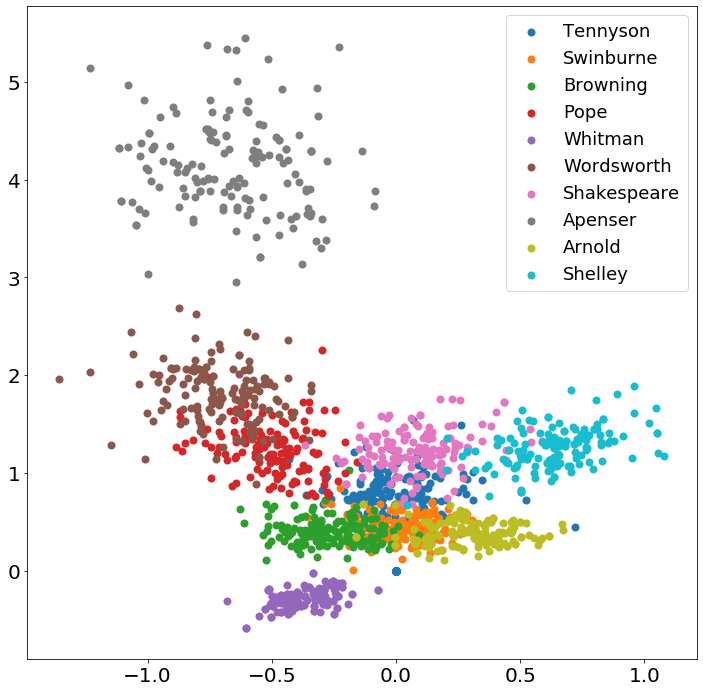

In [223]:
from sklearn.neighbors import KNeighborsClassifier as KNC
train_embeddings_otl, train_labels_otl = extract_embeddings(train_Loader, MODEL, 2)
KNN = KNC(n_neighbors=3)
KNN.fit(train_embeddings_otl, train_labels_otl)
plot_embeddings(train_embeddings_otl, train_labels_otl, save_plot='training.png', legend= True)

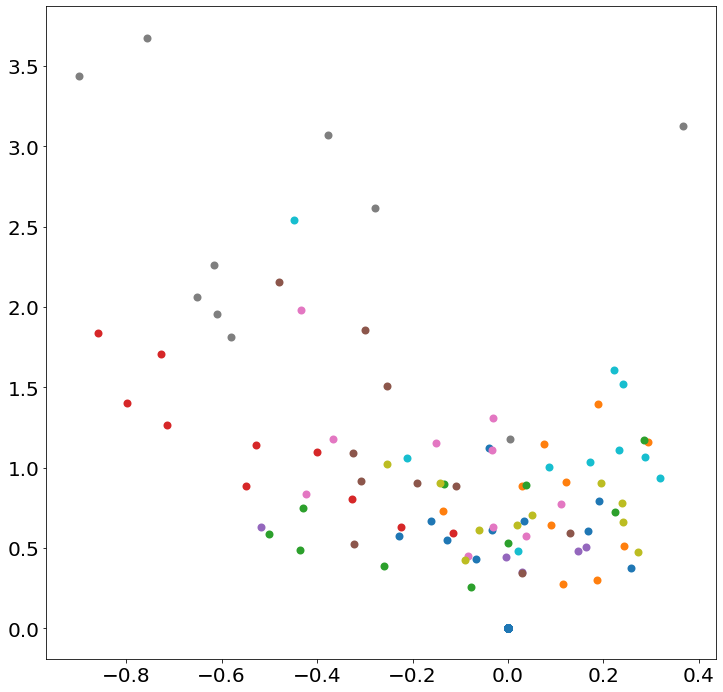

In [224]:
valid_embeddings_otl, valid_labels_otl = extract_embeddings(valid_Loader, MODEL, 2)
plot_embeddings(valid_embeddings_otl, valid_labels_otl,save_plot='valid.png')


In [225]:
KNN.score(valid_embeddings_otl,valid_labels_otl),KNN.score(train_embeddings_otl,train_labels_otl)

(0.5977011494252874, 0.8950735764555342)

0.5111940298507462

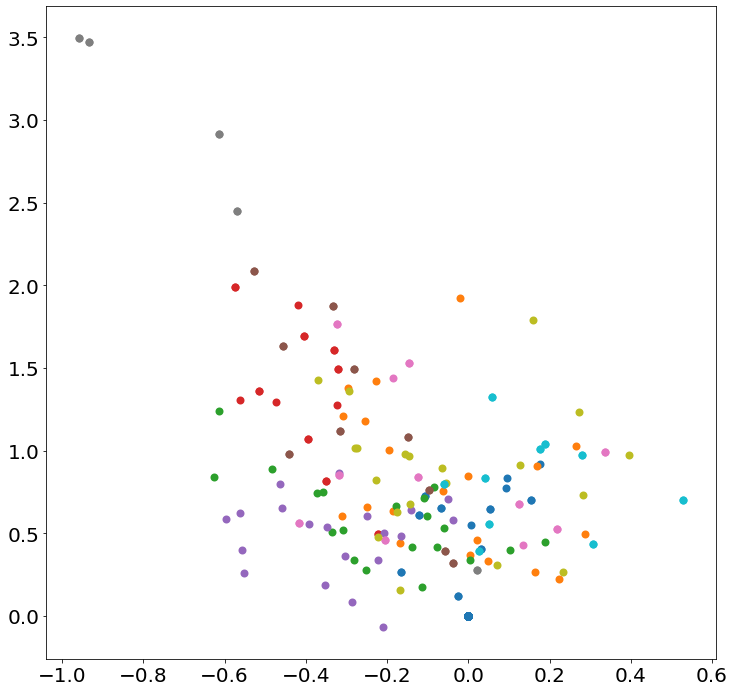

In [226]:
test_embeddings_otl, test_labels_otl = extract_embeddings(test_Loader, MODEL, 2)
plot_embeddings(test_embeddings_otl, test_labels_otl,save_plot='test.png',linewidths=4)
KNN.score(test_embeddings_otl,test_labels_otl)